In [ ]:
# load
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
plt.rcParams.update({'font.size': 14})

dfh = pd.read_csv('https://www.cdc.gov/growthcharts/data/zscore/zstatage.csv')
dfhf = dfh.loc[dfh['Sex']=='2']; 

In [3]:
# convert to years
ages = dfhf['Agemos'].values; 
agesYearsAll = [float(age)/12 for age in ages]
# yearly data
# agesYears = agesYearsAll[0:-1:24];  
agesYears = agesYearsAll;  

# convert z-score to percentile
cols = ['-2','-1.5','-1','-0.5','0','0.5','1','1.5','2']
percentiles = [round(100*st.norm.cdf(float(z))) for z in cols]

heights = np.array([dfhf[col].values/30.48 for col in cols])

def setupFig(xvals,dataObj,ymin=None,figsize=(9,6)):
    plt.rcParams.update({'font.size': 14})
    yvals = np.array(list(dataObj.values())).flatten()
    step = 1;
    fig, ax = plt.subplots();
    fig.set_size_inches(*figsize)
    ax.grid(which='major', linestyle='-', linewidth='0.5', color='black',alpha=.7,axis='both')
    ax.minorticks_on()
    ax.set_xticks((),minor=True)
    ax.set_yticks(np.arange(0,max(yvals)+1,step),minor=False)
    ax.set_yticks(np.arange(0,max(yvals)+1,step/2),minor=True)
    ax.grid(which='minor', linestyle=':', linewidth='0.5', color='black',alpha=0.5,axis='y')
    ax.set_title('Height vs Age')
    ax.set_xlabel('Age (Years)')
    ax.set_ylabel('Height (ft)')
    ax.set_xticks(np.arange(min(xvals),max(xvals)+1,1));
    if ymin is None:
        ymin = min(yvals);
    ax.set_ylim((ymin,max(yvals)*1.05))    
    return fig, ax;

def growthCurvePlot(ages,dataObj,xync=[]):
    fig, ax = setupFig(ages,dataObj)
    for i in range(len(cols)):
        style = 'k-' if i==4 else 'b--'
        c = '0.0' if i==4 else '0.5'
        for key in dataObj:
            plt.plot(ages,dataObj[key][i],style,c=c)
            plt.text(max(ages)*1.005, dataObj[key][i][-1],str(percentiles[i])+'%',
                 va='center',fontsize=11)
    for row in xync:
        plt.scatter([row[0]],row[1],label=row[2],color=row[3],marker='o')
    if len(xync) > 0:
        plt.legend()
        
def linePlot(xvals,dataObj,ymin=0,marker='',xync=[],figsize=(9,6)):
    fig, ax = setupFig(xvals,dataObj,ymin=ymin,figsize=figsize)
    for key in dataObj:
        ax.plot(xvals,dataObj[key],label=key,marker=marker)
    for row in xync:
        ax.scatter([row[0]],row[1],label=row[2],color=row[3],marker='o')
    ax.legend()
    

Previously we had looked at the <b>average</b> height and weight of females from ages 2 to 20.  The average is like  the middle.  If you take a big group of girls you would expect half of them to be above the line and half of them to be below it.

In this plot we have Meredith, who is average height for a 7 year old, Freida, who is tall for a 7 year old, and Sarah, who is short for a 7 year old.  


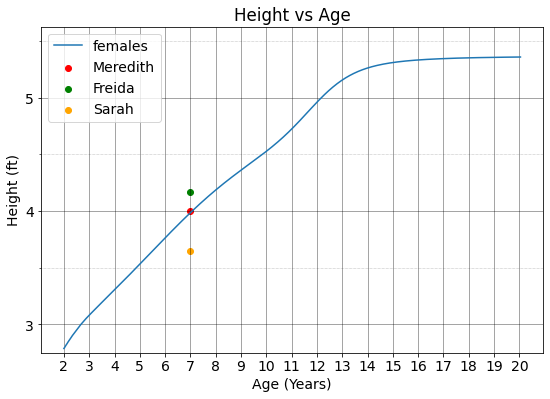

In [5]:
kidsHeights = [
    [7,4,'Meredith','r'],
    [7,4.17,'Freida','green'],
    [7,3.65,'Sarah','orange']];
linePlot(agesYears,{'females':heights[4]},ymin=2.75,xync=kidsHeights)

#### Q: How tall is Freida?  Is she a little tall or very tall for her age?

<em>we can't really tell</em>

We know that Freida being above the line tells us she is taller than most 7 year olds, but we don't know how much taller.  And Sarah being below the line tells us she is shorter than most 7 year olds, but we dont' know by how much.

To answer these questions we need to plot some more lines.  We need more than just the average middle height.  

Another name for the average is "50th percentile".  "Percent" means "per 100" or "out of 100".  So "50th percentile" means that out of 100 girls, 50 of them will be below this line.  That also means that the other 100-50=50 will be above the line.

#### Q: If we add a 10th percentile line to the plot, out of 100 girls, how many would be below the line and how many would be above it?

<em>10 below, 90 above</em>

#### Q: Would a 10th percentile line be above or below the 50th percentile average line on the plot?

<em>below</em>

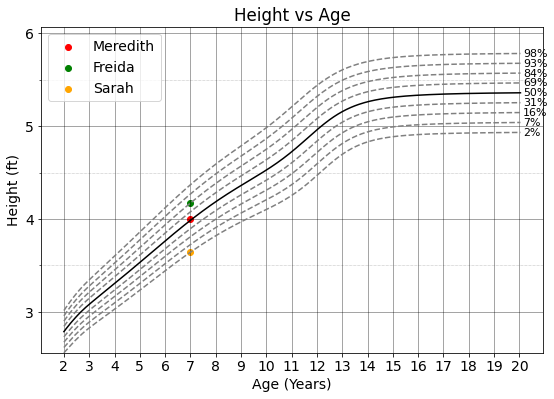

In [6]:
growthCurvePlot(agesYears,{'females':heights},xync=kidsHeights)

Let's zoom in around the range from age 5 to 9 so it's easier to read the percentiles.

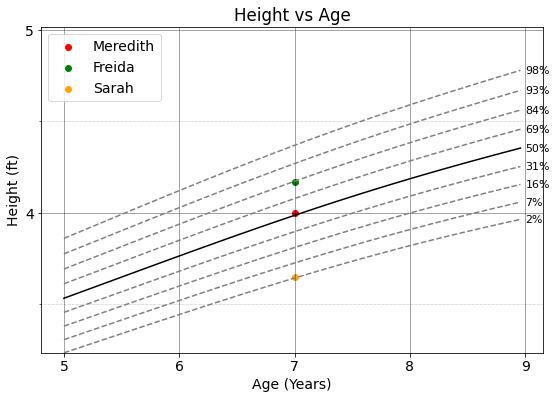

In [7]:
ind5=agesYears.index(5.0)
ind9=agesYears.index(9.0)
agesYears1 = agesYears[ind5:ind9];
heights1 = heights[:,ind5:ind9]
growthCurvePlot(agesYears1,{'females':heights1},xync=kidsHeights)

Now we can see that Sarah is 2nd percentile, meaning out of 100 females only 2 are shorter than her! Therefore, 100-2=98 out of 100 will be taller than her.


#### Q: What percentile is Frieda, and out of 100 seven year olds how many are likely to be taller than her?

<em>84th percentile.  100-84 = 16 will probably be taller.</em>

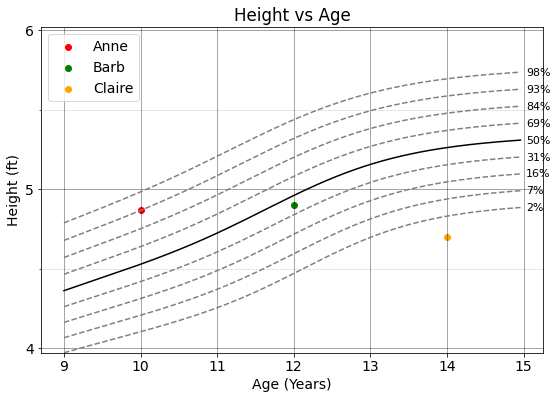

In [8]:
ind15=agesYears.index(15.0)
agesYears2 = agesYears[ind9:ind15];
heights2 = heights[:,ind9:ind15]
growthCurvePlot(agesYears2,{'females':heights2},xync=[
    [10,4.87,'Anne','red'],
    [12,4.9,'Barb','green'],
    [14,4.7,'Claire','orange']
])

#### Q: What percentile is Anne, and out of 100 ten year olds how many are likely to be shorter than her?

<em>93rd percentile.  93 girls will probably be shorter. </em>

#### Q: What percentile is Barb, and out of 100 twelve year olds how many are likely to be taller than her?

<em>42nd percentile.  100-42 = 58 girls will probably be taller. </em>

#### Q: Claire is very short for a 14 year old.  Her height is 4.7 feet.  How old would she have to be for her height of 4.7 feet to be average height?

<em>10 and a half years old</em>